In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./include')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
def feed_forward(a0,w,b):
    a = a0
    num_layers = len(w)
    # feed the input layer forward
    for ℓ in range(num_layers):
        z = np.dot(w[ℓ],a) + b[ℓ]
        a = 1.0/(1.0+np.exp(-z))
    return a


<h2>Question 1a:</h2>
Find {w,b} for AND function in shallow NN

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


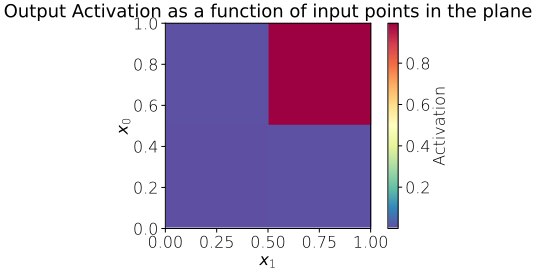

In [3]:
N=[2,1]
w,b = [[10,10]],[-15]
grid_size = 2 # the size of the grid of input values
a1 = np.zeros([grid_size,grid_size])  # this will hold the output values
X0 = np.zeros_like(a1)
X1 = np.zeros_like(a1)

# we will apply our simple NN for all grid points in the box x = [-0.5..0.5,-0.5..0.5]
for i in range(grid_size):
    for j in range(grid_size):
        a0 = [i,j]
        a1[i,j] = feed_forward(a0,w,b)
        X0[i,j] = a0[0]
        X1[i,j] = a0[1]
plt.imshow(a1,origin='lower', extent=(0.0,1.0,0.0,1.0),  cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Activation')
plt.title('Output Activation as a function of input points in the plane')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

<h2>Question 1b:</h2>
Find {w,b} for XOR function

First block: find solution

In [130]:
N=[2,2,1] 

while True:
    w,b = [],[]
    for ℓ in range(1,len(N)):
        w.append(np.random.uniform(low=-2,high=2,size=(N[ℓ],N[ℓ-1])))
        b.append(np.random.uniform(low=-2,high=2, size=N[ℓ]))
    if ((feed_forward([1,1],w,b)<0.1) and (feed_forward([0,0],w,b)<0.1) and 
        (feed_forward([0,1],w,b)>0.9) and (feed_forward([1,0],w,b)>0.9)):
        print(w)
        print(b)
        break




Note: I ran the above code on my local machine to find the weights and stripped out the np.array():
[array([[ 2.61084915,  2.85316797],
       [-1.7738325 , -2.34604943],
       [-6.0826994 ,  6.6516611 ],
       [ 9.19516907, -5.42893131]]), array([[-7.30733762, -0.09262004,  9.72250212,  8.3150884 ],
       [ 6.64598199, -2.87220929, -7.26072429,  2.57593868]]), array([[8.14953824, 8.70037095]])]
[array([-3.43029729, -3.80367384, -4.02603778, -4.6584711 ]), array([-3.1436217 , -7.10480873]), array([-5.45367692])]


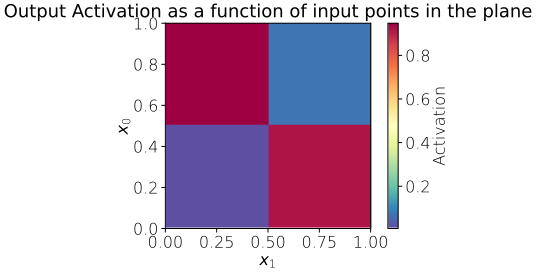

In [4]:
w=[[[ 2.61084915,  2.85316797],
       [-1.7738325 , -2.34604943],
       [-6.0826994 ,  6.6516611 ],
       [ 9.19516907, -5.42893131]], [[-7.30733762, -0.09262004,  9.72250212,  8.3150884 ],
       [ 6.64598199, -2.87220929, -7.26072429,  2.57593868]],[[8.14953824, 8.70037095]]]
b=[[-3.43029729, -3.80367384, -4.02603778, -4.6584711 ], [-3.1436217 , -7.10480873],[-5.45367692]]
grid_size = 2 # the size of the grid of input values
a1 = np.zeros([grid_size,grid_size])  # this will hold the output values
X0 = np.zeros_like(a1)
X1 = np.zeros_like(a1)

# we will apply our simple NN for all grid points in the box x = [-0.5..0.5,-0.5..0.5]
for i in range(grid_size):
    for j in range(grid_size):
        a0 = [i,j]
        a1[i,j] = feed_forward(a0,w,b)
        X0[i,j] = a0[0]
        X1[i,j] = a0[1]
plt.imshow(a1,origin='lower', extent=(0.0,1.0,0.0,1.0),  cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Activation')
plt.title('Output Activation as a function of input points in the plane')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_0$');

<h2> Question 2 </h2>
   
See [A02_2.pdf](./A02_2.pdf)


<h2> Question 3:</h2>

Non-linear curve fitting


In [5]:
!head C60_nmr.dat

# Ch Shift [ppm]         Intensity [arb]
      4.94240036	     -0.00341535
      5.34654062	      0.01362526
      5.48103393	     -0.01352983
      5.72144358	     -0.02962094
      5.97842725	     -0.10792436
      6.30495735	      0.08369806
      6.45551406	      0.00789721
      6.79061605	      0.02323168
      6.97147558	      0.04645734


In [6]:
x,y = np.loadtxt('./C60_nmr.dat',unpack=True)

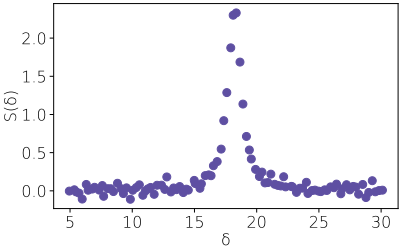

In [7]:
plt.plot(x,y,'o') 
plt.xlabel('δ')
plt.ylabel('S(δ)');

<h2> 3b) </h2>
Choosing a "guess" of starting parameters $\alpha=18$ and $\beta=0.4$

In [46]:
from jax import jacfwd
import jax.numpy as jnp
import json

def S(w,δ):
    return 1/((δ-w[0])**2+w[1])
def cost(w,x,y):
    return 0.5*jnp.average((S(w,x)-y)**2)


w = jnp.array([18,.4],dtype=float)
v = jnp.array([0.,0.],dtype=float)
 

η=0.5
γ=0.0 # I was playing around with momenta, zeroed for the submission
num_iter = 100

for i in range(num_iter):
    v = γ*v + η*jacfwd(cost)(w,x,y)
    w -= v
    


with open("C60_optimal.json","w") as outfile:
    json.dump({"alpha":float(w[0]),"beta":float(w[1]),"num_iter":num_iter,"eta":float(η)},outfile,indent=1)
    

# ### Testing block    
# print(w)
# !cat C60_optimal.json
# print(cost(w,x,y))

0.001335798


<h2> 3c </h2>
Plot

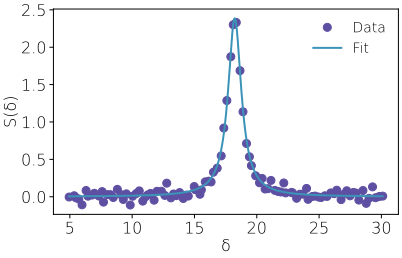

In [43]:
x_fit,y_fit = [],[]
x_fit = np.linspace(np.min(x),np.max(x),1000)
y_fit = S(w,x_fit)

plt.plot(x,y,'o',label="Data") 
plt.plot(x_fit,y_fit,'-',label="Fit")
plt.xlabel('δ')
plt.ylabel('S(δ)')
plt.legend()

<h2> Self edification </h2>
Choosing a bad guess of starting parameters to watch it struggle in a local minimum

In [121]:
w = jnp.array([0,0],dtype=float)
v = jnp.array([0.,0.],dtype=float)
# w_grad = 

η=0.5
γ=0.3
num_iter = 1000

for i in range(num_iter):
    v = γ*v + η*jacfwd(cost)(w,x,y)
    w -= v
    
print(w)    

[0.02124046 0.00080064]


<h2> 3d </h2>
Feature maps